In [7]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# установка вывода графиков в окне jupiter
%matplotlib inline

In [8]:
# определение функции
def FButa(x, y):
    return np.power((x - y), 2.) + np.power(((x + y - 10)/3), 2.);

In [9]:
import random

# случайная точка
def get_random(xrange, yrange, state = None):
    if (state is None):
        x,y = -10, -10;

        return x, y;
    
    x = state[0] + random.random() - .5;
    y = state[1] + random.random() - .5;
    return x, y;

# реализация алглоритма имитации отжига (схема Коши)
def simulated_annealing(f, xrange, yrange, fstate, initialTemperature, endTemperature):
    # список проверяемых точек
    lstate = [];
    
    # задаём начальное состояние, как случайную точку
    state = get_random(xrange, yrange, fstate);
    lstate.append(state);
    
    # вычисляем энергию для первого состояния
    currentEnergy = f(state[0], state[1]);
    
    # начальная температура
    T = initialTemperature
    
    for iterator in range(1, 100000):
        # получаем состояние-кандидат
        stateCandidate = get_random(xrange, yrange, state);
        
        # вычисляем его энергию
        candidateEnergy = f(stateCandidate[0], stateCandidate[1]);
        
        # разница между состояниями
        deltaEnergy = candidateEnergy - currentEnergy
        
        # если кандидат обладает меньшей энергией
        if (deltaEnergy < 0):
            # то он переходит в текущее состояние
            currentEnergy = candidateEnergy
            state = stateCandidate
        else:
            # иначе, считаем вероятность
            p = np.exp(-deltaEnergy/T)

            # и смотрим, осуществится ли переход
            if (np.random.rand() <= p):
                currentEnergy = candidateEnergy
                state = stateCandidate

        # уменьшаем температуру (схема Коши)
        T = initialTemperature / iterator; 

        # запись текущей точки
        lstate.append(state);
        
        # технологический вывод
        if iterator % 1000 == 0:
            print("Iteration #:%d, temperature:%f, cost:%.3f" % (iterator, T, currentEnergy))
        
        # условие выхода
        if T <= endTemperature:
            break
            
    return state, currentEnergy, lstate

In [10]:
# запуск алгоритма  
point, cost, lstate = simulated_annealing(FButa, (-10, 10), (-10, 10), None, 500, 0.1);

Iteration #:1000, temperature:0.500000, cost:0.918
Iteration #:2000, temperature:0.250000, cost:0.036
Iteration #:3000, temperature:0.166667, cost:0.035
Iteration #:4000, temperature:0.125000, cost:0.005
Iteration #:5000, temperature:0.100000, cost:0.049


In [11]:
print ('Минимум:{0} в точке ({1}, {2})'.format(cost, point[0], point[1]));

Минимум:0.04920442917189827 в точке (5.176576949488279, 5.323083987750896)


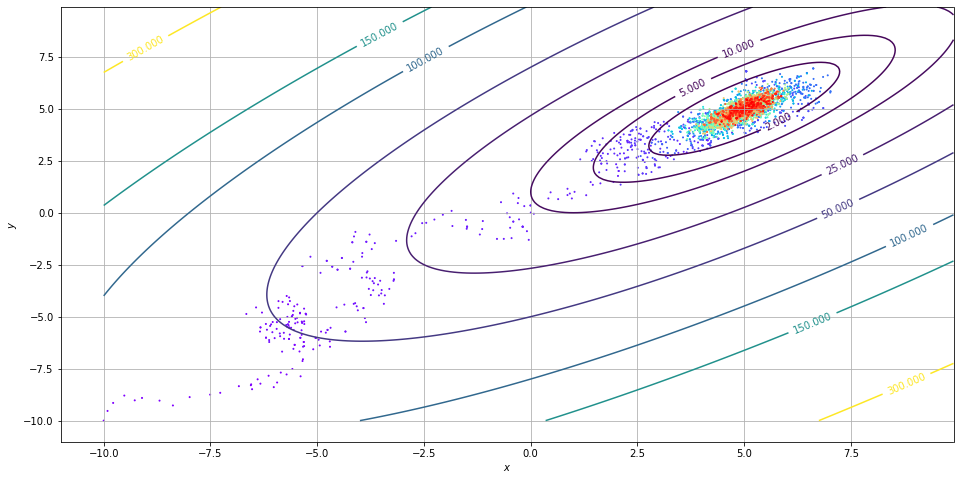

In [12]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# определение данных
X = np.arange(-10, 10, .1)
Y = np.arange(-10, 10, .1)
X, Y = np.meshgrid(X, Y)

Z = FButa(X,Y)

# вывод функции (1)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300]);

# вывод точек
p = np.array(lstate);
colors = cm.rainbow(np.linspace(0, 1, len(p)))
ax.scatter(p[:,0], p[:,1], s = 1, color = colors)

# добавление подписей к линиям уровня
ax.clabel(cs);

ax.grid();

plt.show()

In [13]:
rom __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
        return ((x - y)*(x - y)) + (((x + y - 10)/3)*((x + y - 10)/3));
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print 'FINAL:'
        print pos_best_g
        print err_best_g

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[5,5]               # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=15,maxiter=30)

SyntaxError: invalid syntax (<ipython-input-13-049ece46d9ba>, line 1)

Iteration #:1000, temperature:0.100000, cost:0.100
Iteration #:1000, temperature:0.100000, cost:0.297
Iteration #:1000, temperature:0.100000, cost:0.208


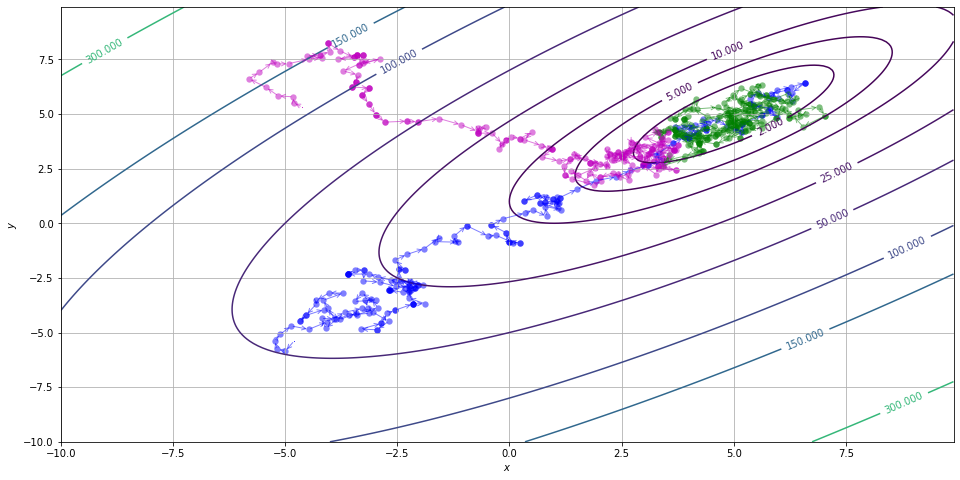

In [14]:
 #установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# вывод функции (1)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300,450]);

# каждый агент - выделение цветом
colors = ['b', 'g', 'm']

# с разных точек
fstate = [(-5, -5), (5, 5), (-5, 5)];

for state, color in zip(fstate, colors):
    point, cost, lstate = simulated_annealing(FButa, (-10, 10), (-10, 10), state, 100, 0.1);

    # вывод точек
    # p = np.array(lstate);
    # ax.scatter(p[:,0], p[:,1], s = 1, color = color)

    # вывод точек
    p = np.array(lstate);
    p = p[:200];
    
    ax.scatter(p[0,0], p[0,1], c=color, s = 1, lw = 0, alpha = 1)
    for j in range(1, len(p)):
        ax.scatter(p[j, 0], p[j, 1], c = color, s = 40, lw = 0, alpha = 0.5)
        ax.annotate('', xy=(p[j, 0], p[j, 1]), xytext=(p[j-1, 0], p[j-1,1]), alpha=0.5,
                    arrowprops={'arrowstyle': '->', 'color': color, 'lw': 1, 'alpha': 0.5},
                    va='center', ha='center')

# добавление подписей к линиям уровня
ax.clabel(cs);
ax.grid();

plt.show()